<a href="https://colab.research.google.com/github/KuJoJoTaRo2019/HaveFun/blob/master/Project0_short_semester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project0 is a typical machine learning project which contains two parts, Classification & Regression. Their working process are quite similar.**
1. Data getting
2. Data visualize
3. Use several classical learning algorithms to train and predict (both on train set, but use cross-validation)
4. Choose the best algorithm and use gridsearch to find the best parameters
5. Repeat 3.&4. using ensemble algorithms
6. Get your best algorithm with the best parameters, run it on test set
---



##**8.2.1 Classification project training**

In [1]:
#@title Import

import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



In [2]:
#@title Download data from UCI

import os, requests
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
fname = "sonar_mine_rock.npz"
if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)
alldata = read_csv('sonar_mine_rock.npz',header = None)

### Quick view on your data

In [ ]:
print(alldata.shape)

(208, 61)


In [ ]:
# Check data type
set_option('display.max_rows',500)
print(alldata.dtypes)

In [ ]:
# Print the First 20 samples
set_option('display.width',100)
print(alldata.head(20))

        0       1       2       3       4   ...      56      57      58      59  60
0   0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032   R
1   0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044   R
2   0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078   R
3   0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117   R
4   0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094   R
5   0.0286  0.0453  0.0277  0.0174  0.0384  ...  0.0057  0.0027  0.0051  0.0062   R
6   0.0317  0.0956  0.1321  0.1408  0.1674  ...  0.0092  0.0143  0.0036  0.0103   R
7   0.0519  0.0548  0.0842  0.0319  0.1158  ...  0.0085  0.0047  0.0048  0.0053   R
8   0.0223  0.0375  0.0484  0.0475  0.0647  ...  0.0065  0.0093  0.0059  0.0022   R
9   0.0164  0.0173  0.0347  0.0070  0.0187  ...  0.0032  0.0035  0.0056  0.0040   R
10  0.0039  0.0063  0.0152  0.0336  0.0310  ...  0.0042  0.0003  0.0053  0.0

In [ ]:
# A brief summary
set_option('precision',3)
print(alldata.describe())

            0          1        2   ...         57         58         59
count  208.000  2.080e+02  208.000  ...  2.080e+02  2.080e+02  2.080e+02
mean     0.029  3.844e-02    0.044  ...  7.949e-03  7.941e-03  6.507e-03
std      0.023  3.296e-02    0.038  ...  6.470e-03  6.181e-03  5.031e-03
min      0.002  6.000e-04    0.002  ...  3.000e-04  1.000e-04  6.000e-04
25%      0.013  1.645e-02    0.019  ...  3.600e-03  3.675e-03  3.100e-03
50%      0.023  3.080e-02    0.034  ...  5.800e-03  6.400e-03  5.300e-03
75%      0.036  4.795e-02    0.058  ...  1.035e-02  1.033e-02  8.525e-03
max      0.137  2.339e-01    0.306  ...  4.400e-02  3.640e-02  4.390e-02

[8 rows x 60 columns]


In [ ]:
# Count the binary label
print(alldata.groupby(60).size())

60
M    111
R     97
dtype: int64


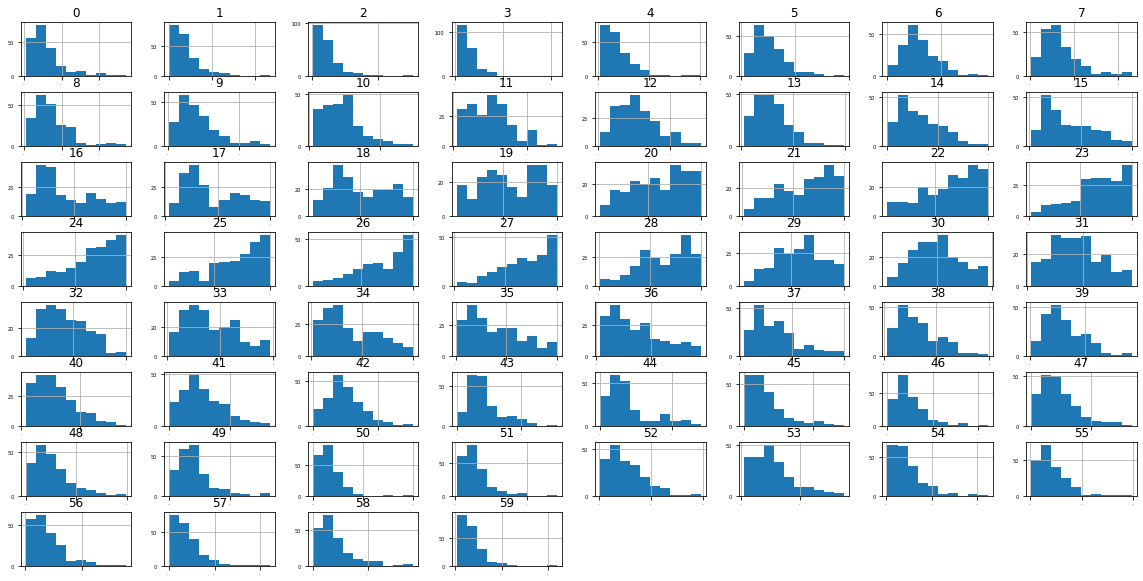

In [7]:
# Distribution histogram on every column
rcParams['figure.figsize'] = [20, 10]
alldata.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 5)
pyplot.show()

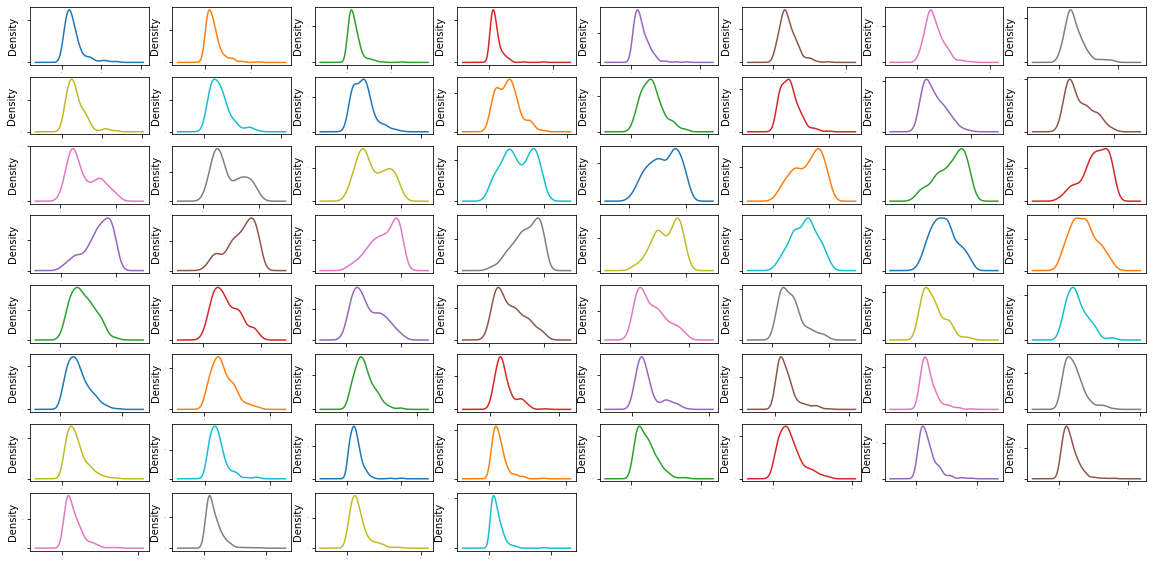

In [ ]:
# Distribution plot on every column
rcParams['figure.figsize'] = [20, 10]
alldata.plot(kind = 'density', subplots = True, layout = (8,8),
             sharex = False , legend = False, fontsize = 1)
pyplot.show()

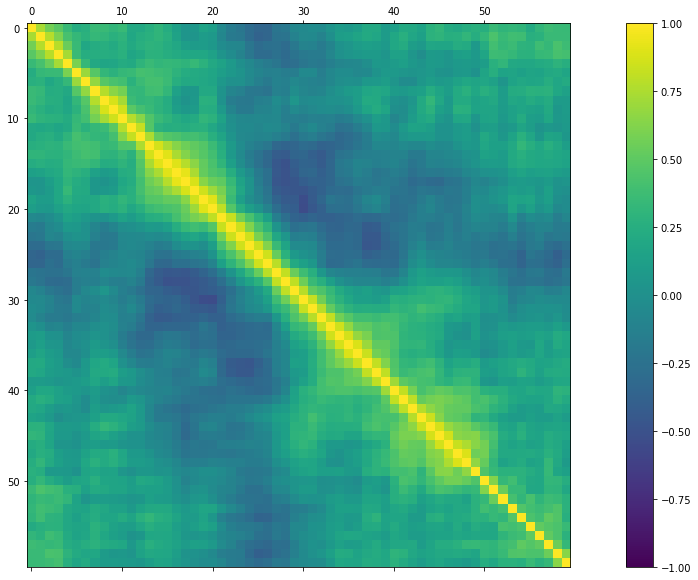

In [ ]:
# Correlations between columns
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(alldata.corr(),vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
pyplot.show()

### Classical Algorithms

In [ ]:
# split the train set and the test set
array = alldata.values
X = array[:,0:60].astype(float)
y = array[:,60]
validation_size = 0.2
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, 
              test_size = validation_size, random_state = seed)

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

In [ ]:
# 10 folds cv using 6 different classification algorithms
results = []
for key in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(models[key],X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  print('%s : %f ( %f )' % (key, cv_results.mean(), cv_results.std()))

LR : 0.777574 ( 0.088423 )
LDA : 0.778676 ( 0.093570 )
KNN : 0.758824 ( 0.106417 )
CART : 0.727941 ( 0.103596 )
NB : 0.682721 ( 0.136040 )
SVM : 0.765074 ( 0.087519 )


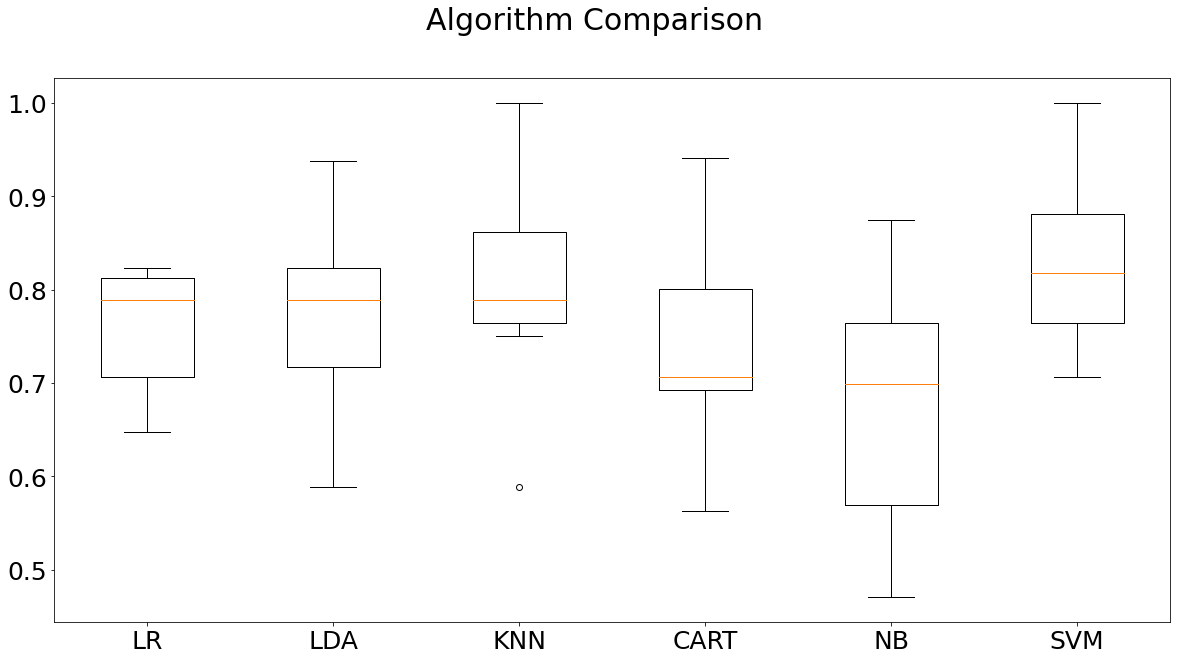

In [ ]:
# Boxplot
rcParams['font.size'] = 25
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [ ]:
# StandardScaler before training
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])

results = []
for key in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(pipelines[key],X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  print('%s : %f(%f)' % (key, cv_results.mean(), cv_results.std()))

ScalerLR : 0.754412(0.067926)
ScalerLDA : 0.778676(0.093570)
ScalerKNN : 0.808456(0.107996)
ScalerCART : 0.733456(0.101915)
ScalerNB : 0.682721(0.136040)
ScalerSVM : 0.826103(0.081814)


In [ ]:
# Search for the best parameters
rescaledX = StandardScaler().fit_transform(X_train)
param_grid = {'C':[0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.6,1.7,1.8,1.9,2.0],'kernel':['linear','poly','rbf','sigmoid']}
model = SVC()
# param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
# model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,
                    cv = kfold)
grid_result = grid.fit(X = rescaledX, y = y_train)
print('Best : %f use %s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
         grid_result.cv_results_['std_test_score'],
         grid_result.cv_results_['params'])
for mean, std, param in cv_results:
  print('%f (%f) with %r'%(mean,std,param))

### Ensemble Algorithms

In [ ]:
ensembles = {}
ensembles['ScalerAB'] = Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostClassifier())])
ensembles['ScalerGBM'] = Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingClassifier())])
ensembles['ScalerRF'] = Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestClassifier())])
ensembles['ScalerET'] = Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesClassifier())])

results = []
for key in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(ensembles[key],X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  print('%s : %f(%f)' % (key, cv_results.mean(), cv_results.std()))

ScalerAB : 0.782721(0.072445)
ScalerGBM : 0.771691(0.136282)
ScalerRF : 0.832721(0.086927)
ScalerET : 0.849632(0.062076)


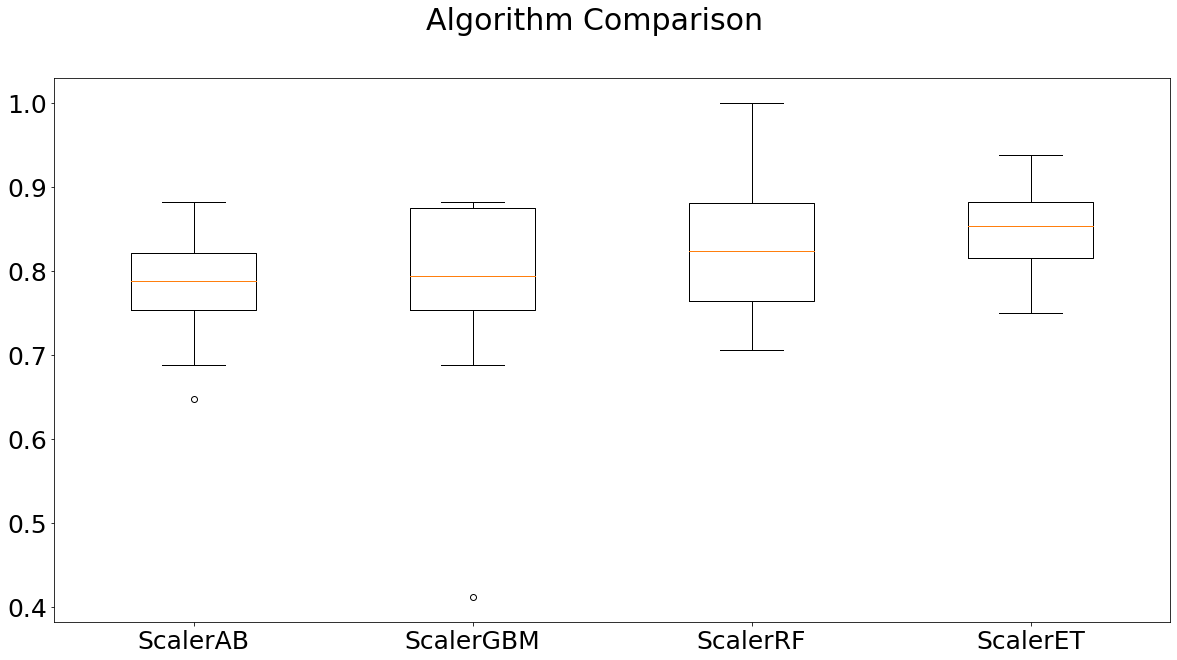

In [ ]:
# boxplot
rcParams['font.size'] = 25
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

In [ ]:
# Search for the best parameters
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[10,50,100,200,300,400,500,600,700,800,900],}
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring=scoring, cv = kfold)
grid_result = grid.fit(X=rescaledX,y=y_train)
print('Best case : %f use %s'%(grid_result.best_score_,grid_result.best_params_))

Best case : 0.874632 use {'n_estimators': 200}


### Your Final Model

In [ ]:
rescaledX = scaler.fit_transform(X_train) # standardize the data(train set) first
model = ExtraTreesClassifier(n_estimators=200) # use the best algorithm and the best parameters
model.fit(X=rescaledX,y=y_train)

rescaled_validationX = scaler.transform(X_validation) # standardize the data(test set) first
predictions = model.predict(rescaled_validationX) # use the standardized data to predict
# Output the predict result and the ground truth 
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation,predictions))


0.9047619047619048
[[25  2]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.93      0.93      0.93        27
           R       0.87      0.87      0.87        15

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



## **8.2.2 Regression project training**

In [8]:
#@title Import

import numpy as np
from numpy import arange
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor



In [9]:
#@title Download data from UCI

import os, requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
fname = "Boston_House_Price.npz"
if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
         'RAD','TAX','PRTATIO','B','LSTAT','MEDV']
alldata = read_csv(fname,names = names, delim_whitespace=True)

### quick view on your data

In [ ]:
print(alldata.shape)

(506, 14)


In [ ]:
# Check data type
print(alldata.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [ ]:
# Print the first 30 samples
# set_option('display.line_width',120)
print(alldata.head(30))

       CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PRTATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  .

In [ ]:
# A brief summary
set_option('precision',1)
print(alldata.describe())

          CRIM     ZN  INDUS     CHAS  ...  PRTATIO      B  LSTAT   MEDV
count  5.1e+02  506.0  506.0  5.1e+02  ...    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02  ...     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01  ...      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00  ...     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00  ...     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00  ...     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00  ...     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00  ...     22.0  396.9   38.0   50.0

[8 rows x 14 columns]


In [ ]:
# Correlation Matrix
set_option('precision',2)
print(alldata.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX  ...   TAX  PRTATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42  ...  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  ... -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76  ...  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  ... -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00  ...  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  ... -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73  ...  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  ... -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61  ...  0.91     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  0.67  ...  1.00     0.46 -0.44   0.54 -0.47
PRTATIO  0.29 -0.39   0.38 -1.22e-01  0.19  ...  0.46     1.00 -0.18   0.37 -0.51
B       -0.39  0

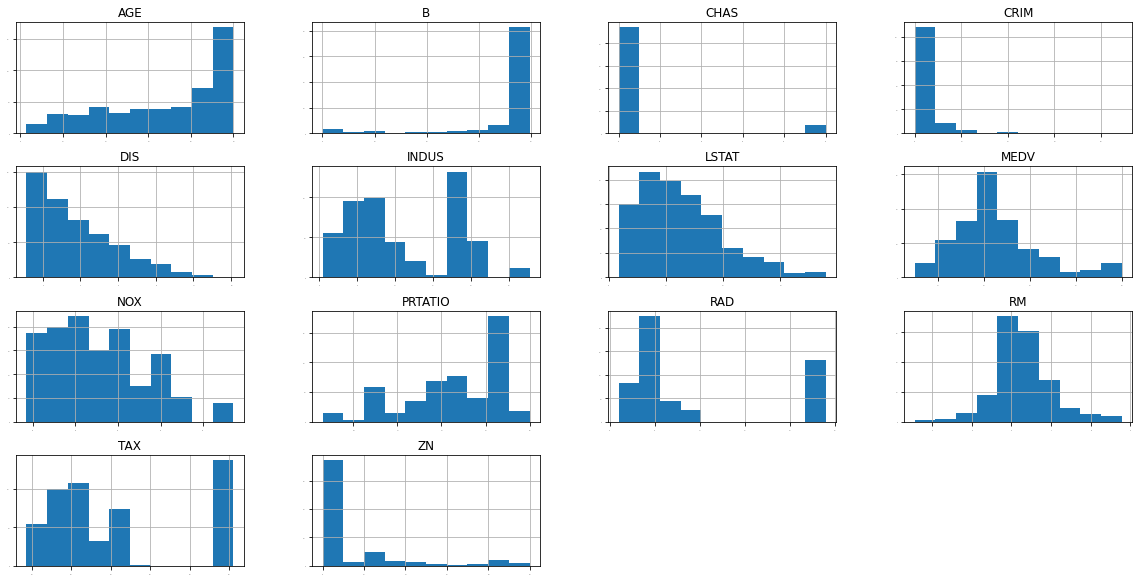

In [ ]:
# Distribution histograms on every feature
rcParams['figure.figsize'] = [20, 10]
alldata.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
pyplot.show()

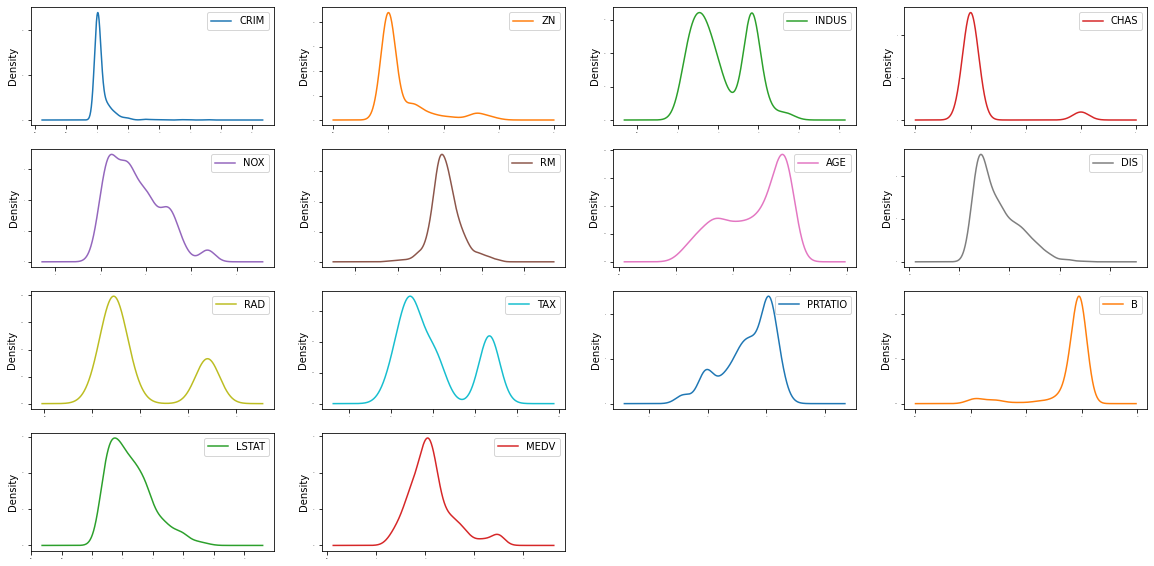

In [ ]:
# Distribution plot on every feature
rcParams['figure.figsize'] = [20, 10]
alldata.plot(kind='density',subplots=True, layout=(4,4),sharex= False, fontsize =1)
pyplot.show()

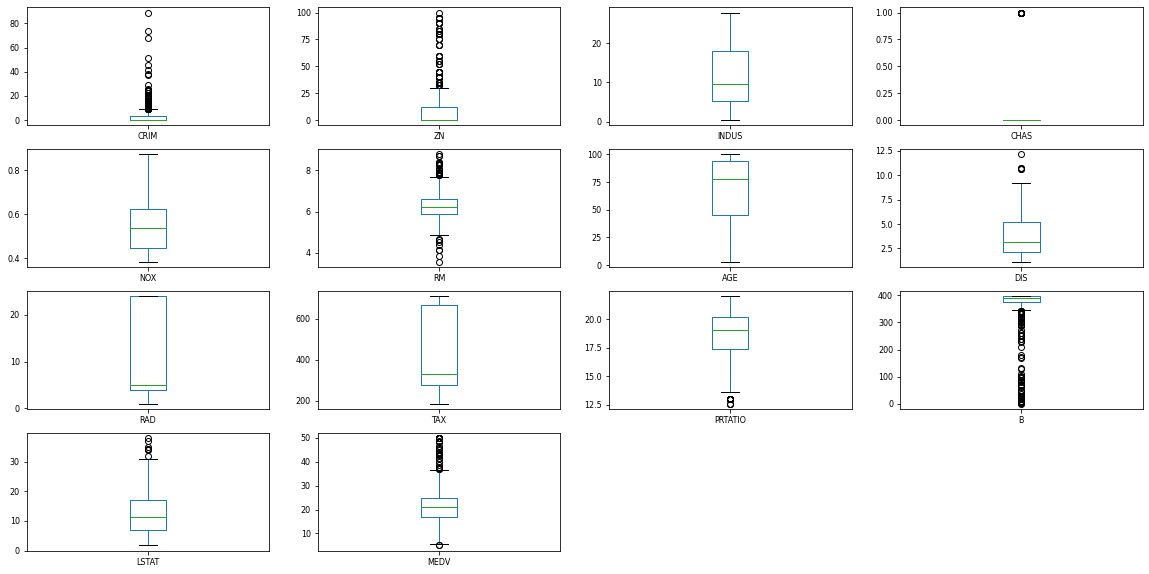

In [ ]:
# Boxplot on every feature
rcParams['figure.figsize'] = [20, 10]
alldata.plot(kind='box',subplots=True, layout=(4,4),sharex= False,sharey = False, fontsize =8)
pyplot.show()

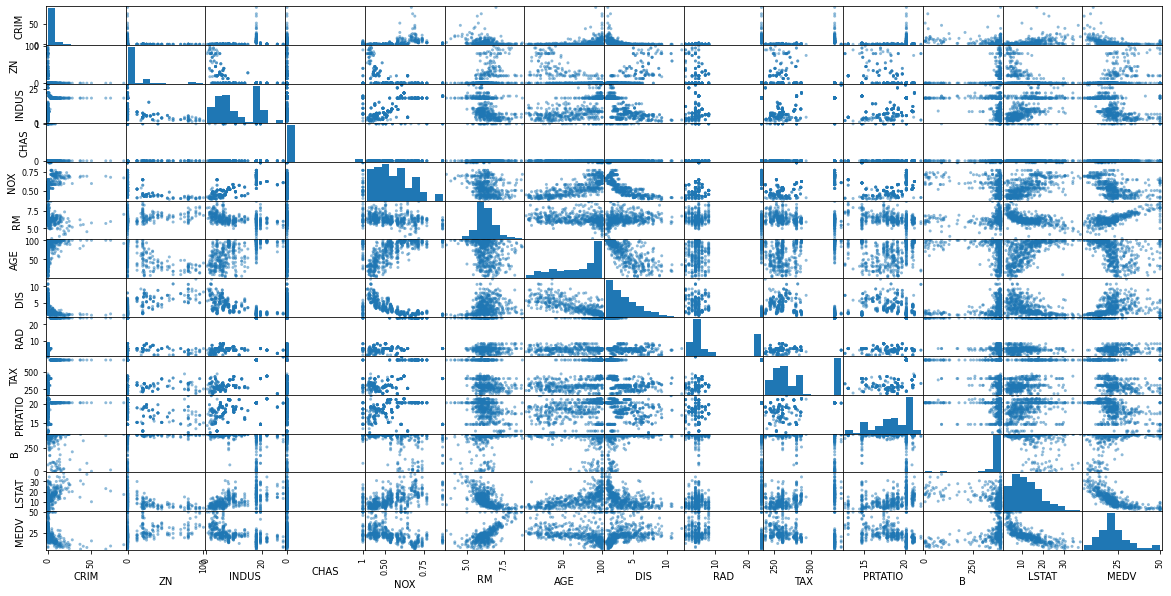

In [ ]:
# Plot all-data in one figure
scatter_matrix(alldata)
pyplot.show()

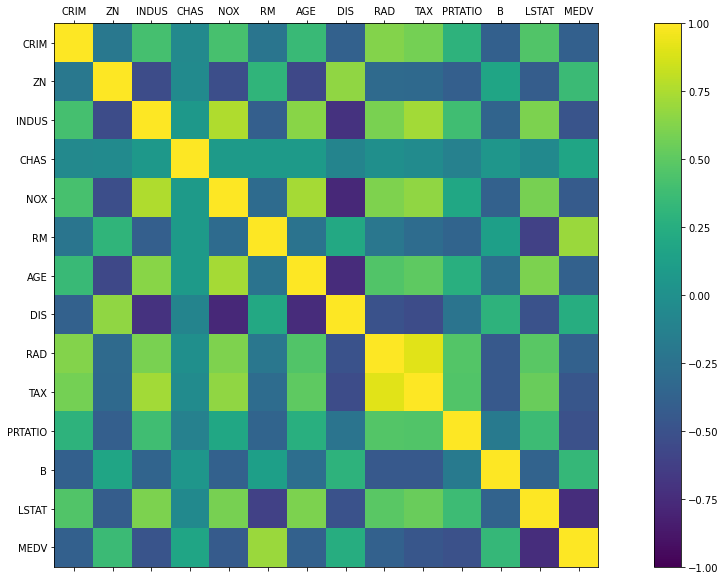

In [ ]:
# Correlation Matrix figure
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(alldata.corr(),vmin=-1,vmax=1,interpolation = 'none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

### Classical Algorithms

In [10]:
# split the train set and the test set
array = alldata.values
X = array[:, 0:13]
y = array[:,13]
validation_size = 0.2
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = validation_size, random_state = seed)

In [11]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [ ]:
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

In [ ]:
# 10 folds cv using 6 different regression algorithms
results = []
for key in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  # kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(models[key],X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  print('%s : %f ( %f )' % (key, cv_results.mean(), cv_results.std()))

LR : -22.006009 ( 12.188886 )
LASSO : -27.105803 ( 13.165915 )
EN : -27.923014 ( 13.156405 )
KNN : -39.808936 ( 16.507968 )
CART : -24.662522 ( 16.683536 )
SVM : -67.824705 ( 32.801530 )


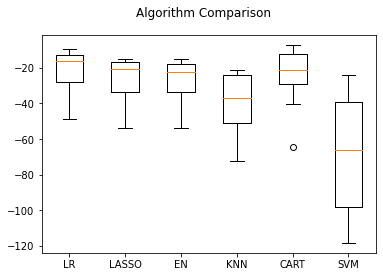

In [ ]:
# Boxplot
rcParams['font.size'] = 10
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [ ]:
# StandardScaler before training
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])
pipelines['ScalerKNN'] = Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])
pipelines['ScalerEN'] = Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])
pipelines['ScalerSVR'] = Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])

results = []
for key in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(pipelines[key],X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  print('%s : %f(%f)' % (key, cv_results.mean(), cv_results.std()))

ScalerLR : -22.006009(12.188886)
ScalerLASSO : -27.205896(12.124418)
ScalerKNN : -21.456867(15.016218)
ScalerCART : -24.716335(16.220542)
ScalerEN : -28.301160(13.609110)
ScalerSVR : -29.570433(18.052964)


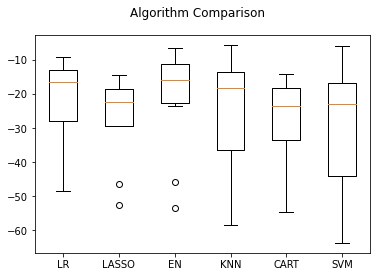

In [ ]:
# Boxplot
rcParams['font.size'] = 10
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [ ]:
# Search for the best parameters
rescaledX = StandardScaler().fit_transform(X_train)
# param_grid = {'C':[0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.6,1.7,1.8,1.9,2.0],'kernel':['linear','poly','rbf','sigmoid']}
# model = SVC()
# param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
# model = KNeighborsClassifier()
param_grid = {'alpha':[1e-3,9e-3,8e-3,7e-3,6e-3,1e-2,2e-2,3e-2,4e-2,5e-2,],'l1_ratio':[1e-4,1e-3,1e-2,0.1,0.2,0.3]}
model = ElasticNet()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,
                    cv = kfold)
grid_result = grid.fit(X = rescaledX, y = y_train)
print('Best : %f use %s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
         grid_result.cv_results_['std_test_score'],
         grid_result.cv_results_['params'])
for mean, std, param in cv_results:
  print('%f (%f) with %r'%(mean,std,param))

Best : -21.930898 use {'alpha': 0.03, 'l1_ratio': 0.0001}
-21.999098 (12.188971) with {'alpha': 0.001, 'l1_ratio': 0.0001}
-21.999105 (12.188972) with {'alpha': 0.001, 'l1_ratio': 0.001}
-21.999171 (12.188984) with {'alpha': 0.001, 'l1_ratio': 0.01}
-21.999830 (12.189113) with {'alpha': 0.001, 'l1_ratio': 0.1}
-22.000553 (12.189238) with {'alpha': 0.001, 'l1_ratio': 0.2}
-22.001288 (12.189364) with {'alpha': 0.001, 'l1_ratio': 0.3}
-21.958304 (12.189449) with {'alpha': 0.009, 'l1_ratio': 0.0001}
-21.958341 (12.189446) with {'alpha': 0.009, 'l1_ratio': 0.001}
-21.958702 (12.189403) with {'alpha': 0.009, 'l1_ratio': 0.01}
-21.962515 (12.189018) with {'alpha': 0.009, 'l1_ratio': 0.1}
-21.966956 (12.188633) with {'alpha': 0.009, 'l1_ratio': 0.2}
-21.971487 (12.188277) with {'alpha': 0.009, 'l1_ratio': 0.3}
-21.962173 (12.189408) with {'alpha': 0.008, 'l1_ratio': 0.0001}
-21.962209 (12.189405) with {'alpha': 0.008, 'l1_ratio': 0.001}
-21.962552 (12.189361) with {'alpha': 0.008, 'l1_ratio': 

### Ensemble Algorithms

In [ ]:
ensembles = {}
ensembles['ScalerAB'] = Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])
ensembles['ScalerAB-LR'] = Pipeline([('Scaler',StandardScaler()),('ABLR',AdaBoostRegressor(LinearRegression()))])
ensembles['ScalerAB-KNN'] = Pipeline([('Scaler',StandardScaler()),('ABKNN',AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])

ensembles['ScalerGBR'] = Pipeline([('Scaler',StandardScaler()),('GBR',GradientBoostingRegressor())])
ensembles['ScalerRFR'] = Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestRegressor())])
ensembles['ScalerETR'] = Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesRegressor())])

results = []
for key in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(ensembles[key],X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  print('%s : %f(%f)' % (key, cv_results.mean(), cv_results.std()))

ScalerAB : -15.697078(7.989253)
ScalerAB-LR : -22.582713(8.162586)
ScalerAB-KNN : -15.833929(11.520588)
ScalerGBR : -10.743571(8.599722)
ScalerRFR : -12.828799(9.836996)
ScalerETR : -9.039210(6.488220)


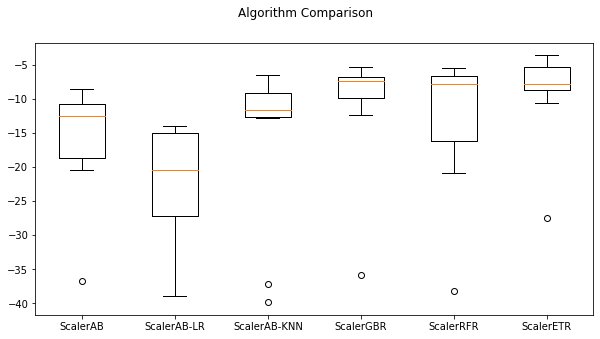

In [ ]:
# Boxplot
rcParams['font.size'] = 10
rcParams['figure.figsize'] = [10, 5]
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

In [ ]:
# Search for the best parameters
rescaledX = StandardScaler().fit_transform(X_train)
param_grid = {'n_estimators':[10,50,100,200,300,400,500,600,700,800,900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring=scoring, cv = kfold)
grid_result = grid.fit(X=rescaledX,y=y_train)
print('Best case : %f use %s'%(grid_result.best_score_,grid_result.best_params_))

rescaledX = StandardScaler().fit_transform(X_train)
param_grid = {'n_estimators':[5,10,20,30,40,50,60,70,80]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring=scoring, cv = kfold)
grid_result = grid.fit(X=rescaledX,y=y_train)
print('Best case : %f use %s'%(grid_result.best_score_,grid_result.best_params_))

Best case : -10.427222 use {'n_estimators': 700}
Best case : -9.127397 use {'n_estimators': 60}


### Your Final Model

13.481507870370363


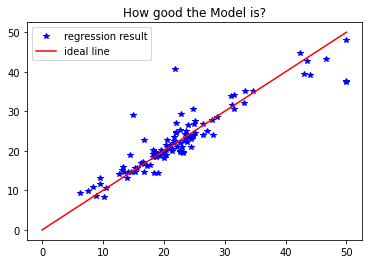

In [19]:
rescaledX = StandardScaler().fit_transform(X_train) # standardize the data(train set) first
scaler = StandardScaler().fit(X_train)
et = ExtraTreesRegressor(n_estimators=60) # use the best algorithm and the best parameters
et.fit(X=rescaledX,y=y_train)

rescaled_validationX = scaler.transform(X_validation) # standardize the data(test set) first
predictions = et.predict(rescaled_validationX) # use the standardized data to predict
# Output the predict result and the ground truth 
print(mean_squared_error(y_validation,predictions))
pyplot.plot(y_validation,predictions,'b*',[0,50],[0,50],'r')
pyplot.legend(['regression result','ideal line'])
pyplot.title('How good the Model is?')
pyplot.show()